In [ ]:
try:
    from google.colab import drive
    drive.mount('/gdrive')
    %cd "/gdrive/MyDrive/NOT_RELEVANT/deep/ex4"

except:
    print('Not in google colab')

import os
os.getcwd()

Mounted at /gdrive
/gdrive/MyDrive/NOT_RELEVANT/deep/ex4


'/gdrive/MyDrive/NOT_RELEVANT/deep/ex4'

# Part 1

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np




*   play with net - leaky Relu, activation function, batchnorm
*   PCA - visualization
*   Generate 100 samples



# Preprocess Data

In [ ]:
# load the data
diabetes_filepath = 'diabetes.arff'
german_filepath = 'german_credit.arff'

data = arff.loadarff(german_filepath)
german_df = pd.DataFrame(data[0])

data = arff.loadarff(diabetes_filepath)
diabetes_df = pd.DataFrame(data[0])

german_df
diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,b'tested_positive'


In [ ]:
def remove_class_col(df):
    col_name = df.columns[df.shape[1]-1]
    df = df.drop([col_name], axis=1)
    return df

german_df = remove_class_col(german_df)
diabetes_df = remove_class_col(diabetes_df)

In [ ]:
german_df.select_dtypes(include=np.number).columns.tolist()


['2', '5', '8', '11', '13', '16', '18']

In [ ]:
# extract numeric and categorical columns
german_continuous_features = german_df.select_dtypes(include=np.number).columns.tolist()
german_categorical_features = [col for col in german_df.columns if col not in german_continuous_features]

diabetes_continuous_features = diabetes_df.select_dtypes(include=np.number).columns.tolist()
diabetes_categorical_features = [col for col in diabetes_df.columns if col not in diabetes_continuous_features]

print("German credit continuous features: ", german_continuous_features)
print("German credit categorical features: ", german_categorical_features)
print("Diabetes continuous_features: ", diabetes_continuous_features)
print("Diabetes categorical features: ", diabetes_categorical_features)



German credit continuous features:  ['2', '5', '8', '11', '13', '16', '18']
German credit categorical features:  ['1', '3', '4', '6', '7', '9', '10', '12', '14', '15', '17', '19', '20']
Diabetes continuous_features:  ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
Diabetes categorical features:  []


In [ ]:
# convert discrete columns to 'categorical' type column
def convert_categorical_to_codes(categorical_features, target_df):
  for column in categorical_features:
    target_df[column] = target_df[column].astype('category').cat.codes
  return target_df

german_df = convert_categorical_to_codes(german_categorical_features, german_df)
diabetes_df = convert_categorical_to_codes(diabetes_categorical_features, diabetes_df)

german_df.head()
diabetes_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [ ]:
# c = '16'
# min = german_df[c].min()
# max = german_df[c].max()
# feature_bins = pd.cut(german_df[c], bins=10, labels=False)
# feature_bins

# # german_df[c]

In [ ]:
# divide number into bins
def normalize_continuos_columns(continuous_features, target_df):
    for column in continuous_features:
        min = target_df[column].min()
        max = target_df[column].max()
        feature_bins = pd.cut(target_df[column], bins=10, labels=False)
        target_df.drop([column], axis=1, inplace=True)
        target_df = pd.concat([target_df, feature_bins], axis=1)
    return target_df

german_df = normalize_continuos_columns(german_continuous_features, german_df)
diabetes_df = normalize_continuos_columns(diabetes_continuous_features, diabetes_df)

diabetes_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,3,7,5,3,0,5,2,4
1,0,4,5,2,0,3,1,1
2,4,9,5,0,0,3,2,1
3,0,4,5,2,1,4,0,0
4,0,6,3,3,1,6,9,1


In [ ]:
# normalize values (bin value -> normalized value)
from sklearn.preprocessing import PowerTransformer

def apply_power_transformer(df):
  pw= PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
  pwt=pw.fit_transform(df[df.columns])
  return pwt

german_df[german_df.columns]= apply_power_transformer(german_df)
diabetes_df[diabetes_df.columns]= apply_power_transformer(diabetes_df)

diabetes_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.865662,0.887104,-0.296022,0.893887,-0.751685,0.615893,0.925556,1.281513
1,-1.243473,-0.987297,-0.296022,0.329450,-0.751685,-1.091206,0.294352,0.160022
2,1.168488,2.089339,-0.296022,-1.313442,-0.751685,-1.091206,0.925556,0.160022
3,-1.243473,-0.987297,-0.296022,0.329450,1.096812,-0.263540,-1.097087,-1.054141
4,-1.243473,0.273247,-1.536129,0.893887,1.096812,1.540849,2.236797,0.160022


In [ ]:
# training configuration
noise_dim = 64
dim = 20
batch_size = 32

log_step = 100
epochs = 400
learning_rate = 3e-4
models_dir = 'model'

In [ ]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

from tensorflow.keras.optimizers import Adam

class GAN():
    
    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.generator = Generator(self.batch_size).\
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator(self.batch_size).\
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim,))
        record = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(record)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)

        from keras import backend        
        # implementation of wasserstein loss
        def wasserstein_loss(y_true, y_pred):
            return backend.mean(y_true * y_pred)

        def boundary_loss(y_true, y_pred):
            return 0.5 * backend.mean((backend.log(y_pred) - backend.log(1 - y_pred))**2)

        # self.combined.compile(loss=boundary_loss, optimizer=optimizer)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))
        
    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments
        
        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))

        for epoch in range(epochs):    
            # ---------------------
            #  Train Discriminator
            # ---------------------
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images
            gen_data = self.generator.predict(noise)
    
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(batch_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)
    
            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
    
            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                #Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

                #Here is generating the data
                z = tf.random.normal((432, self.noise_dim))
                gen_data = self.generator(z)
                print('generated_data')

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return
    
    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator
    
class Generator():
    def __init__(self, batch_size):
        self.batch_size=batch_size
        
    def build_model(self, input_shape, dim, data_dim):
        input= Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim, activation='relu')(input)
        x = Dropout(0.5)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(data_dim)(x)
        model = Model(inputs=input, outputs=x)
        print("generator: /n", model.summary())
        return model

class Discriminator():
    def __init__(self,batch_size):
        self.batch_size=batch_size
    
    def build_model(self, input_shape, dim):
        input = Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim * 4, activation='relu')(input)
        x = Dropout(0.95)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.95)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        model = Model(inputs=input, outputs=x)
        print("discriminator: /n", model.summary())
        return model


In [ ]:
gan_args = [batch_size, learning_rate, noise_dim, german_df.shape[1], dim]
train_args = ['', epochs, log_step]

In [ ]:

data_cols = german_df.columns
german_df[data_cols] = german_df[data_cols]

# print(german_df.shape[1])

Generator(batch_size).build_model(noise_dim, dim, german_df.shape[1]).summary()
Discriminator(batch_size).build_model(german_df.shape[1], dim).summary()

In [ ]:
!mkdir model
!mkdir model/gan
!mkdir model/gan/saved

mkdir: cannot create directory ‘model’: File exists
mkdir: cannot create directory ‘model/gan’: File exists
mkdir: cannot create directory ‘model/gan/saved’: File exists


In [ ]:
model = GAN

synthesizer = model(gan_args)
synthesizer.train(german_df, train_args)

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(32, 64)]                0         
_________________________________________________________________
dense_64 (Dense)             (32, 20)                  1300      
_________________________________________________________________
dropout_29 (Dropout)         (32, 20)                  0         
_________________________________________________________________
dense_65 (Dense)             (32, 40)                  840       
_________________________________________________________________
dropout_30 (Dropout)         (32, 40)                  0         
_________________________________________________________________
dense_66 (Dense)             (32, 80)                  3280      
_________________________________________________________________
dropout_31 (Dropout)         (32, 80)                  0  

In [ ]:
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 64



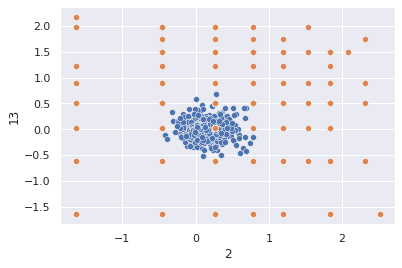

In [ ]:
import seaborn as sns

real = synthesizer.get_data_batch(train=german_df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols)

z = np.random.normal(size=(test_size, noise_dim))
generated_z = synthesizer.generator.predict(z)

# sns.scatterplot(data=tips, x="total_bill", y="tip")
gen_samples = pd.DataFrame(generated_z, columns=data_cols)
    # gen_samples.to_csv('Generated_sample.csv')
sns.scatterplot(data=gen_samples, x="2", y="13" )
sns.scatterplot(data=real_samples, x="2", y="13" )
#     plt.title("Generated Data")   
#     plt.xlabel(data_cols[0])
#     ax.set_xlim(xlims), ax.set_ylim(ylims)
# gen_samples


In [ ]:
# Part 1. section 3.a
# Collect generated samples with realatively high and low probability in the discriminator
high_acc = np.zeros(100)
high_val = 100*[None]

low_acc = np.ones(100)
low_val = 100*[None]

for i in range(100):
    z = np.random.normal(size=(test_size, noise_dim))
    generated_z = synthesizer.generator.predict(z)

    y_pred = synthesizer.discriminator.predict(generated_z)
    # print(y_pred.min(), y_pred.max(), y_pred.mean())
    # break
    for i, val in enumerate(y_pred):
        if val > high_acc.min():
            high_acc[np.argmin(high_acc)] = val
            high_val[np.argmin(high_acc)] = generated_z[i]

        elif val < low_acc.max():
            low_acc[np.argmax(low_acc)] = val
            low_val[np.argmax(low_acc)] = generated_z[i]


* high prob acc on discriminator -> discriminator succeed more than generator -> not fooled discriminator -> more far than real data

* low prob acc on discriminator -> generator succeed more than discriminator -> fooled the discriminator -> closer to real data

Euclidian Distance of generated data that fooled discriminator is closer to the real data comparing to samples that didn't fool

In [ ]:
# Part 1. section 3.a - cont.
# Euclidian distance and cosine similarity
mean_real_data = german_df.mean(axis=0)

mat = np.asarray(high_val)
mean_high_prob_fake = mat.mean(axis=0)
 
mat = np.asarray(low_val)
mean_low_prob_fake = mat.mean(axis=0)

print("Euclidian Distance of generated data that didn't fool the discrimminator: ",np.linalg.norm(mean_high_prob_fake - mean_real_data))
print("Euclidian Distance of generated data that fool the discrimminator: ", np.linalg.norm(mean_low_prob_fake - mean_real_data))

from scipy import spatial
# higher is better
print("\nCosine similarity of generated data that didn't fool the discrimminator: ", 1 - spatial.distance.cosine(mean_high_prob_fake, mean_real_data))
print("Cosine similarity of generated data that fool the discrimminator: ", 1 - spatial.distance.cosine(mean_low_prob_fake, mean_real_data))

Euclidian Distance of generated data that didn't fool the discrimminator:  1.897112348991274
Euclidian Distance of generated data that fool the discrimminator:  1.3217590049039882

Cosine similarity of generated data that didn't fool the discrimminator:  0.25392352630357373
Cosine similarity of generated data that fool the discrimminator:  0.32716641911270017


Text(0.5, 1.0, 'Examples that fooled Disciminator PCA')

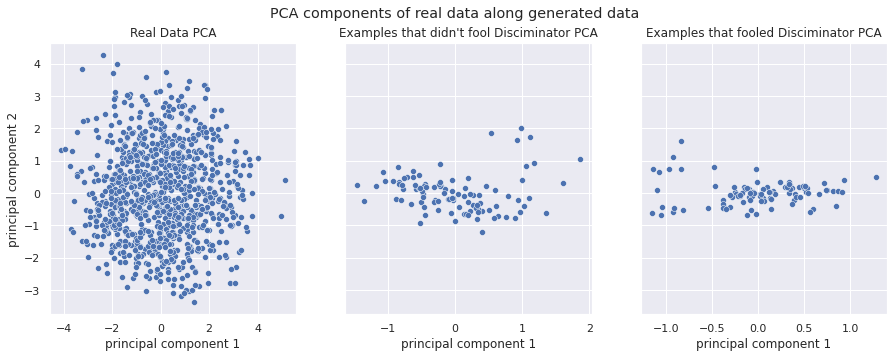

In [ ]:
# Part 1. section 3.a - visualization: PCA
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

# Convert generated samples to ndarray
high_val = np.asarray(high_val)
low_val = np.asarray(low_val)

# decompose to PCA and show
def get_pca_df(df):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2'])
    return principalDf

real_pca = get_pca_df(german_df)
high_val_pca = get_pca_df(high_val)
low_val_pca = get_pca_df(low_val)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('PCA components of real data along generated data')

sns.scatterplot(data=real_pca, x="principal component 1", y="principal component 2", ax=axes[0])
axes[0].set_title('Real Data PCA')
sns.scatterplot(data=high_val_pca, x="principal component 1", y="principal component 2", ax=axes[1])
axes[1].set_title('Examples that didn\'t fool Disciminator PCA')
sns.scatterplot(data=low_val_pca, x="principal component 1", y="principal component 2", ax=axes[2])
axes[2].set_title('Examples that fooled Disciminator PCA')


In [ ]:
# Part 1. section 3.b
batch_size = 100
z = np.random.normal(size=(batch_size, noise_dim))
generated_z = synthesizer.generator.predict(z)

y_pred = synthesizer.discriminator.predict(generated_z)
# print(y_pred.min(), y_pred.max(), y_pred.mean())
# break
counter = 0
for i, val in enumerate(y_pred):
    if val > 0.5:
        counter+=1
print(f"{counter} samples out of {batch_size} were able to pass as real samples")

8 samples out of 100 were able to pass as real samples


In [ ]:
# Part 1. section 3.c


# Part 2

- Y and C are scalars
- D gets sample and Y & C

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np

# load the data
diabetes_filepath = 'diabetes.arff'
german_filepath = 'german_credit.arff'

data = arff.loadarff(german_filepath)
german_df = pd.DataFrame(data[0])

data = arff.loadarff(diabetes_filepath)
diabetes_df = pd.DataFrame(data[0])

def convertClassToCat(df):
    class_col = df.columns[-1]
    df[class_col] = pd.Categorical(df[class_col])
    df[class_col] = df[class_col].cat.codes
    df[class_col]
    return df

german_df = convertClassToCat(german_df)
diabetes_df = convertClassToCat(diabetes_df)
diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [ ]:
from sklearn.preprocessing import PowerTransformer

def normalize_categorical_df(df):
    # extract numeric and categorical columns
    continuous_features = df.select_dtypes(include=np.number).columns.tolist()
    categorical_features = [col for col in df.columns if col not in continuous_features]

    print("continues features: ", continuous_features, " ,categorical features: ", categorical_features)

    # convert discrete columns to 'categorical' type column
    def convert_categorical_to_codes(categorical_features, target_df):
        for column in categorical_features:
            target_df[column] = target_df[column].astype('category').cat.codes
        return target_df

    df = convert_categorical_to_codes(categorical_features, df)

    # divide number into bins
    def normalize_continuos_columns(continuous_features, target_df):
        for column in continuous_features:
            feature_bins = pd.cut(target_df[column], bins=10, labels=False)
            target_df.drop([column], axis=1, inplace=True)
            target_df = pd.concat([target_df, feature_bins], axis=1)
        return target_df

    df = normalize_continuos_columns(continuous_features, df)

    # normalize values (bin value -> normalized value)
    def apply_power_transformer(df):
        pw= PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
        pwt=pw.fit_transform(df[df.columns])
        return pwt

    df[df.columns]= apply_power_transformer(df)
    return df

# normalized_german_df = normalize_categorical_df(german_df)
# normalized_diabetes_df = normalize_categorical_df(diabetes_df)
# normalized_diabetes_df.head(5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


cls = RandomForestClassifier(n_estimators=80, criterion='entropy')

# return df as x, y
def getTrainSet(df):
    cols = df.columns
    x = df.drop([cols[-1]], axis=1)
    y = df[cols[-1]]
    return x, y

X,y = getTrainSet(diabetes_df)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X = normalize_categorical_df(X)
X_test = normalize_categorical_df(X_test)
# y
cls.fit(X, y)


continues features:  ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']  ,categorical features:  []
continues features:  ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']  ,categorical features:  []


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
!mkdir model
!mkdir model/gan
!mkdir model/gan/saved

In [ ]:
# training configuration
noise_dim = 64
dim = 32
batch_size = 32

log_step = 100
epochs = 400
learning_rate = 3e-4
models_dir = 'model'

In [ ]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam

class GAN():
    
    def __init__(self, gan_args, BB):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.BB = BB
        
        self.generator = Generator(self.batch_size).\
            build_model(input_shape=(self.noise_dim + 1,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator(self.batch_size).\
            build_model(input_shape=(self.data_dim + 1,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim + 1,), batch_size=self.batch_size)
        print('z shape:', z.shape)
        
        # c = z[:,-1]
        c = tf.keras.layers.Lambda(lambda x: x[:,-1])(z)
        c = tf.expand_dims(c, axis=1)
        print('c shape:', c.shape)

        record = self.generator(z)
        print('record shape:', record.shape)
        concated_record = tf.keras.layers.Concatenate(axis=-1)([record, c])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(concated_record)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        from keras import backend
        
        # implementation of wasserstein loss
        def wasserstein_loss(y_true, y_pred):
            return backend.mean(y_true * y_pred)

        loss_fn = losses.BinaryCrossentropy(from_logits=True)
        self.combined.compile(loss=wasserstein_loss, optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))
        
    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments
        
        data_cols = data.columns
        
        # plot
        loss_g_arr = []
        loss_d_arr = []
        acc_d_arr = []

        # Adversarial ground truths

        for epoch in range(epochs):    
            c = tf.random.uniform((self.batch_size, 1))
            
            valid = np.ones((self.batch_size, 1))
            fake = np.zeros((self.batch_size, 1))
            # valid += 0.05 * tf.random.uniform(valid.shape)
            # fake += 0.05 * tf.random.uniform(fake.shape)
            # ---------------------
            #  Train Discriminator
            # ---------------------
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images, add c
            noise = np.concatenate((noise, c), axis=1)
            gen_data = self.generator.predict(noise)
            # print('gen_data shape:', gen_data.shape)

            # data from black-box
            y = self.BB.predict_proba(gen_data).max(axis=1)
            # print('y shape:', y.shape)

            
            real_data = np.concatenate((gen_data, y[:,None]),axis=1)
            fake_data = np.concatenate((gen_data, c), axis=1)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(real_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(fake_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            loss_d_arr.append(d_loss[0])
            acc_d_arr.append(d_loss[1])

            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            
            # Train the generator (to have the discriminator label samples as valid)
            noise = np.concatenate((noise, c), axis=1)
            g_loss = self.combined.train_on_batch(noise, valid)
            
            loss_g_arr.append(g_loss)
            
            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
    
            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                #Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

                #Here is generating the data
                z = tf.random.normal((432, self.noise_dim+1))
                gen_data = self.generator(z)
                print('generated_data')
        
        return loss_d_arr, loss_g_arr, acc_d_arr

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return
    
    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator
    
class Generator():
    def __init__(self, batch_size):
        self.batch_size=batch_size
        
    def build_model(self, input_shape, dim, data_dim):
        input= Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim, activation='relu')(input)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=input, outputs=x)

class Discriminator():
    def __init__(self,batch_size):
        self.batch_size=batch_size
    
    def build_model(self, input_shape, dim):
        input = Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim * 4, activation='relu')(input)
        x = Dropout(0.7)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.7)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=input, outputs=x)

In [ ]:
model = GAN

gan_args = [batch_size, learning_rate, noise_dim, X.shape[1], dim]
train_args = ['', epochs, log_step]

synthesizer = model(gan_args, cls)
loss_d_arr, loss_g_arr, acc_d_arr = synthesizer.train(X, train_args)
# synthesizer.combined.summary()

z shape: (32, 65)
c shape: (32, 1)
record shape: (32, 8)
0 [D loss: 0.715925, acc.: 46.88%] [G loss: 0.490923]
generated_data
1 [D loss: 0.677829, acc.: 62.50%] [G loss: 0.518414]
2 [D loss: 0.708847, acc.: 46.88%] [G loss: 0.496921]
3 [D loss: 0.691937, acc.: 53.12%] [G loss: 0.520565]
4 [D loss: 0.703891, acc.: 51.56%] [G loss: 0.507887]
5 [D loss: 0.718806, acc.: 42.19%] [G loss: 0.492810]
6 [D loss: 0.687509, acc.: 48.44%] [G loss: 0.489158]
7 [D loss: 0.712504, acc.: 59.38%] [G loss: 0.510657]
8 [D loss: 0.698605, acc.: 48.44%] [G loss: 0.495603]
9 [D loss: 0.692820, acc.: 51.56%] [G loss: 0.485483]
10 [D loss: 0.720845, acc.: 42.19%] [G loss: 0.490423]
11 [D loss: 0.737658, acc.: 34.38%] [G loss: 0.509111]
12 [D loss: 0.729551, acc.: 50.00%] [G loss: 0.499618]
13 [D loss: 0.696633, acc.: 51.56%] [G loss: 0.492105]
14 [D loss: 0.697523, acc.: 53.12%] [G loss: 0.488702]
15 [D loss: 0.727636, acc.: 39.06%] [G loss: 0.498445]
16 [D loss: 0.698481, acc.: 48.44%] [G loss: 0.484874]
17 

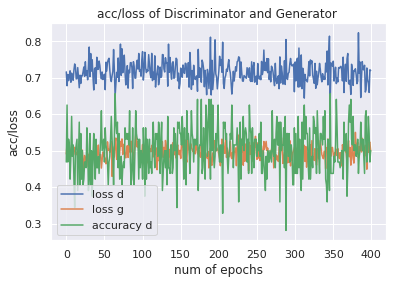

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.xlabel('num of epochs')
plt.ylabel('acc/loss')
plt.title('acc/loss of Discriminator and Generator ')

x = list(range(len(loss_d_arr)))
plt.plot(x, loss_d_arr, label = "loss d")
plt.plot(x, loss_g_arr, label = "loss g")
plt.plot(x, acc_d_arr, label = "accuracy d")
plt.legend()
plt.show()

In [ ]:
len(x), len(loss_d_arr), len(loss_g_arr), len(acc_d_arr)

(400, 400, 400, 400)

In [ ]:
type(y_test.values)

numpy.ndarray

In [ ]:

def evaluate_bb(X_test, y_test):
    # print(X_test.shape, y_test.shape)
    y_pred = cls.predict_proba(X_test)
    out = []
    for idx, label in enumerate(y_test):
        out.append(y_pred[idx, label])

    out = np.asarray(out)

    print("confidence score distribution:")
    print(f"Min={out.min()}")
    print(f"Max={out.max()}")
    print(f"avg={out.mean()}")
    return out

out = evaluate_bb(X_test, y_test.values)

confidence score distribution:
Min=0.0375
Max=1.0
avg=0.6866432178932179


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


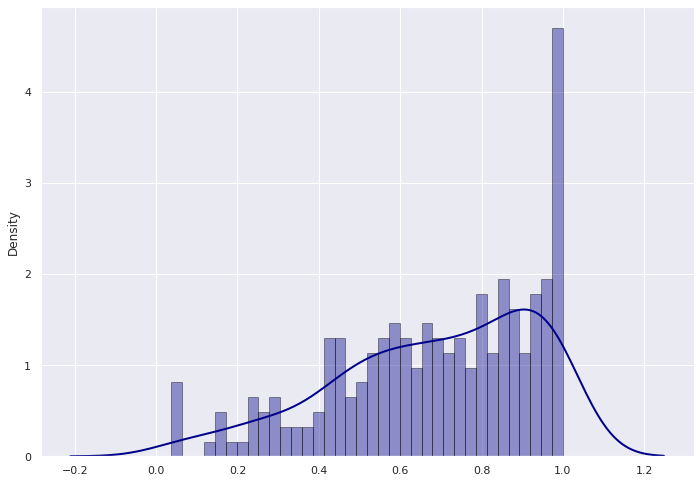

In [ ]:
import seaborn as sns

def plot_dist(dist):
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    sns.distplot(out, hist=True, kde=True, 
                bins=int(180/5), color = 'darkblue', 
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 2})

plot_dist(out)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


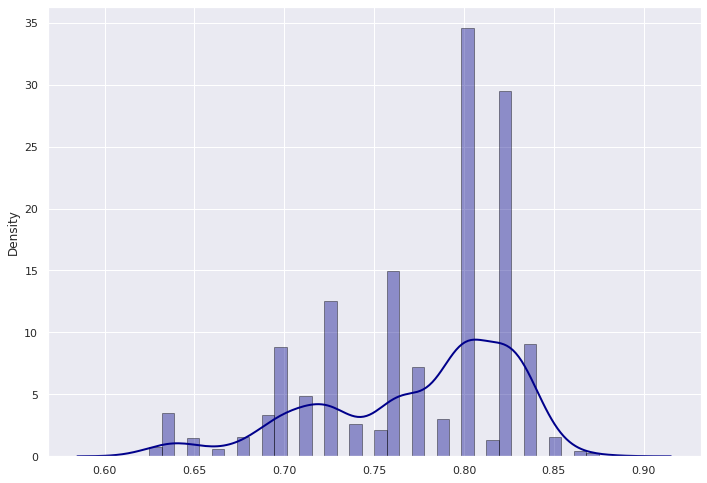

In [ ]:
# Generate 1000 sample with confidence score uniformly sampled from [0,1]

generator = synthesizer.generator

noise = tf.random.normal((1000, noise_dim))
c = np.linspace(0,1, 1000, endpoint=False) #tf.random.uniform((1000, 1))

# Generate a batch of new images, add c
noise = np.concatenate((noise, c[:,None]), axis=1)
gen_data = generator.predict(noise)


y_pred = cls.predict_proba(gen_data)
out = y_pred.max(axis=1)
plot_dist(out)

In [ ]:

# label 0
diff = c - y_pred[:, 0]
dist = np.linalg.norm(diff)
print('label 0 dist: ', dist)

# label 1
diff = c - y_pred[:, 1]
dist = np.linalg.norm(diff)
print('label 1 dist: ', dist)

label 0 dist:  12.789575589127265
label 1 dist:  12.641338685044396
